In [2]:
import pennylane as qml
import numpy as np

In [2]:
from pennylane.pauli import PauliWord
pw1 = PauliWord({0:"X", 1:"Z"})
print(pw1)
i = qml.X(0) @ qml.Z(1)
print(i)
coeffs = [1]
obs_groupings, coeffs_groupings = qml.pauli.group_observables([i], coeffs, 'qwc', 'lf')
obs_groupings

X(0) @ Z(1)
X(0) @ Z(1)


[[X(0) @ Z(1)]]

In [46]:
i = qml.Y(0) @ qml.Z(1)
j =  qml.Y(0) @ qml.I(1)
k = qml.Y(0) @ qml.Y(1)
m = qml.X(0) @ qml.Z(1)


i = qml.Z(0) @ qml.Z(1)
j =  qml.Z(0) @ qml.I(1)
k = qml.I(0) @ qml.Z(1)
m = qml.X(0) @ qml.Z(1)
n = qml.X(0) @ qml.Y(1)
l = [i,j,k,m,n]

coeffs = [1,1,1,1,1]
obs_groupings, coeffs_groupings = qml.pauli.group_observables(l, coeffs, 'qwc', 'lf')
obs_groupings[1][1].matrix()

array([[ 1,  0],
       [ 0, -1]])

In [38]:
qml.I(0).matrix()

array([[1., 0.],
       [0., 1.]])

In [41]:
np.array([[1,0],[0,-1]]) @ np.array([[0,1],[1,0]])

array([[ 0,  1],
       [-1,  0]])

In [83]:
def map_str_qml(h_str):
    print(h_str)
    h_qml = []
    for idx, str in enumerate(h_str):
        
        if str =="Z":
            str = qml.Z(idx)
        elif str =="Y":
            str = qml.Y(idx)
        elif str =="X":
            str = qml.x(idx)
        elif str =="I":
            str = qml.I(idx)
        else:
            print("raise error")
        h_qml.append(str)
    return h_qml

h_st  = "IZYI"
h = [i for i in h_st]
res = qml.I(0)
for mat in map_str_qml(h):
    res = res @ mat

print(res)

['I', 'Z', 'Y', 'I']
I(0) @ I(0) @ Z(1) @ Y(2) @ I(3)


In [105]:
def map_str_qml(h_str):
    #print(h_str)
    h = [i for i in h_str]
    
    h_qml = None
    for idx, str in enumerate(h):
        #print(idx,str)
        if str =="Z":
            str = qml.Z(idx)
        elif str =="Y":
            str = qml.Y(idx)
        elif str =="X":
            str = qml.X(idx)
        elif str =="I":
            str = qml.I(idx)
        else:
            print("raise error")
        
        if idx ==0:
            h_qml = str
        else:
            h_qml = h_qml@str
    return h_qml

map_str_qml(h_st)

I(0) @ Z(1) @ Y(2) @ I(3)

In [4]:
Pauli_str = ["IZZ","XZZ",'IZI',"IIZ"]
p_str = [map_str_qml(i) for i in Pauli_str]
print(p_str[0].matrix().shape)
coeffs = [1,1,1,1]
obs_groupings, coeffs_groupings = qml.pauli.group_observables(p_str, coeffs, 'commuting', 'lf')
print(obs_groupings)
obs_groupings[0][0].matrix().shape
qml.pauli.pauli_word_to_string(obs_groupings[0][3])


NameError: name 'map_str_qml' is not defined

In [5]:
Pauli_str = ["IZZ","XZZ",'IZI',"IIZ"]
print(Pauli_str)
p_str = [qml.pauli.string_to_pauli_word(i) for i in Pauli_str]
print(p_str)
print(p_str[0],qml.pauli.pauli_word_to_matrix(p_str[0]))
coeffs = [1,1,1,1]
obs_groupings, coeffs_groupings = qml.pauli.group_observables(p_str, coeffs, 'commuting', 'lf')
print(obs_groupings)
print([[qml.pauli.pauli_word_to_string(i) for i in obs_grouping] for obs_grouping in obs_groupings])

['IZZ', 'XZZ', 'IZI', 'IIZ']
[Z(1) @ Z(2), X(0) @ Z(1) @ Z(2), Z(1), Z(2)]
Z(1) @ Z(2) [[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]
[[Z(2), Z(1), Z(1) @ Z(2) @ X(0), Z(1) @ Z(2)]]
[['Z', 'Z', 'ZZX', 'ZZ']]


In [127]:
import pennylane as qml

# Define the string of Pauli characters
pauli_string = "XIZY"

# Create the Pauli operator
pauli_operator = qml.pauli.string_to_pauli_word(pauli_string)

# Print the operator
print(pauli_operator)


X(0) @ Z(2) @ Y(3)


In [135]:
import qiskit

In [4]:
import qiskit
Pauli_str = ["IZZ","XZZ",'IZI',"IIZ","YIX","YXX"]
print(Pauli_str)
op = qiskit.quantum_info.PauliList(Pauli_str)

print(op)
op_group = op.group_commuting(qubit_wise=True)#.group_qubit_wise_commuting()
print(op_group)
[i.to_labels() for i in op_group]


['IZZ', 'XZZ', 'IZI', 'IIZ', 'YIX', 'YXX']
['IZZ', 'XZZ', 'IZI', 'IIZ', 'YIX', 'YXX']
[PauliList(['YXX', 'YIX']), PauliList(['IZZ', 'XZZ', 'IIZ', 'IZI'])]


[['YXX', 'YIX'], ['IZZ', 'XZZ', 'IIZ', 'IZI']]

In [1]:
import sys 
sys.path.append("/home/prachi/Dropbox/QC_projects/qae-main/hva")
from pauli_algebra import *

get_list_of_paulis(["1.0*ZZ","-0.5*XI"],3)
#get_powers_of_hamiltonian(["1.0*ZZ","-0.5*XI"],2)

lst= [[(3, 3), (1, 0)]]
total= [(3, 3), (1, 0), (0, 0)]
tot_after [(3, 3), (1, 0), (0, 0), (2, 3)] lst_after = [[(3, 3), (1, 0)], [(2, 3)], []]


[['1.0*ZZ', '1.0*XI'], ['1.0*YZ'], []]

In [1]:
import sys 
sys.path.append("/home/prachi/Dropbox/QC_projects/qae-main/hva")
from pauli_algebra import *
Ham = ['-1.0*ZZIII', '-1.0*IZZII', '-1.0*IZIZI']#, '-1.0*IIIZZ', '0.5*ZIIII', '0.5*IZIII', '0.5*IIZII', '0.5*IIIZI', '0.5*IIIIZ', '-1*XIIII', '-1*IXIII', '-1*IIXII', '-1*IIIXI', '-1*IIIIX']
#get_powers_of_h_set(["1.0*ZZ","1.0*ZI",'1.0*XI'],3)
#l = get_powers_of_h_set(Ham,3)
ll= get_list_of_paulis(Ham,3)
#ll[-1]

lst= [[(3, 3, 0, 0, 0), (0, 3, 3, 0, 0), (0, 3, 0, 3, 0)]]
total= [(3, 3, 0, 0, 0), (0, 3, 3, 0, 0), (0, 3, 0, 3, 0), (0, 0, 0, 0, 0)]
pdt {(3, 0, 3, 0, 0), (3, 0, 0, 3, 0), (0, 0, 0, 0, 0), (0, 0, 3, 3, 0)}
{(0, 0, 0, 0, 0), (0, 3, 3, 0, 0), (3, 3, 0, 0, 0), (0, 3, 0, 3, 0)}
pdt {(3, 3, 3, 3, 0), (0, 3, 3, 0, 0), (3, 3, 0, 0, 0), (0, 3, 0, 3, 0)}
{(3, 0, 3, 0, 0), (3, 3, 0, 0, 0), (0, 3, 0, 3, 0), (0, 0, 3, 3, 0), (0, 0, 0, 0, 0), (3, 0, 0, 3, 0), (0, 3, 3, 0, 0)}
tot_after [(3, 3, 0, 0, 0), (0, 3, 3, 0, 0), (0, 3, 0, 3, 0), (0, 0, 0, 0, 0), (3, 0, 3, 0, 0), (3, 0, 0, 3, 0), (0, 0, 3, 3, 0), (3, 3, 3, 3, 0)] lst_after = [[(3, 3, 0, 0, 0), (0, 3, 3, 0, 0), (0, 3, 0, 3, 0)], [(3, 0, 3, 0, 0), (3, 0, 0, 3, 0), (0, 0, 3, 3, 0)], [(3, 3, 3, 3, 0)]]


In [7]:
len(ll)
count = 0
for i in ll:
    count+=len(i)

print(count)


H3_joao = []
for i in ll:
    for j in i:
        H3_joao.append(j)
    
len(H3_joao)

271


271

In [7]:
print(l[0])

['1.0*ZZIII', '1.0*IZZII', '1.0*IZIZI', '1.0*IIIZZ', '1.0*ZIIII', '1.0*IZIII', '1.0*IIZII', '1.0*IIIZI', '1.0*IIIIZ', '1.0*XIIII', '1.0*IXIII', '1.0*IIXII', '1.0*IIIXI', '1.0*IIIIX']


In [9]:
import sys 
sys.path.append("/home/prachi/Dropbox/QC_projects/qae-main/hva")
from pauli_algebra import *

#get_powers_of_h_set(["1.0*ZZ","1.0*ZI",'1.0*XI'],3)
l = get_powers_of_h_set(['-1.0*ZZIII', '-1.0*IZZII', '-1.0*IZIZI', '-1.0*IIIZZ', '0.5*ZIIII', '0.5*IZIII', '0.5*IIZII', '0.5*IIIZI', '0.5*IIIIZ', '-1*XIIII', '-1*IXIII', '-1*IIXII', '-1*IIIXI', '-1*IIIIX'],3)


order in get_powers_of_h_set 3
th= [(3, 3, 0, 0, 0), (0, 3, 3, 0, 0), (0, 3, 0, 3, 0), (0, 0, 0, 3, 3), (3, 0, 0, 0, 0), (0, 3, 0, 0, 0), (0, 0, 3, 0, 0), (0, 0, 0, 3, 0), (0, 0, 0, 0, 3), (1, 0, 0, 0, 0), (0, 1, 0, 0, 0), (0, 0, 1, 0, 0), (0, 0, 0, 1, 0), (0, 0, 0, 0, 1)]
coeffs_H =  [-1.0, -1.0, -1.0, -1.0, 0.5, 0.5, 0.5, 0.5, 0.5, -1.0, -1.0, -1.0, -1.0, -1.0]
thpow= [(3, 3, 0, 0, 0), (0, 3, 3, 0, 0), (0, 3, 0, 3, 0), (0, 0, 0, 3, 3), (3, 0, 0, 0, 0), (0, 3, 0, 0, 0), (0, 0, 3, 0, 0), (0, 0, 0, 3, 0), (0, 0, 0, 0, 3), (1, 0, 0, 0, 0), (0, 1, 0, 0, 0), (0, 0, 1, 0, 0), (0, 0, 0, 1, 0), (0, 0, 0, 0, 1)]
coeffs =  [-1.0, -1.0, -1.0, -1.0, 0.5, 0.5, 0.5, 0.5, 0.5, -1.0, -1.0, -1.0, -1.0, -1.0]
cx, x -1.0 (3, 3, 0, 0, 0)
3 3
3 3
0 0
0 0
0 0
3 0
3 3
0 3
0 0
0 0
3 0
3 3
0 0
0 3
0 0
3 0
3 0
0 0
0 3
0 3
3 3
3 0
0 0
0 0
0 0
3 0
3 3
0 0
0 0
0 0
3 0
3 0
0 3
0 0
0 0
3 0
3 0
0 0
0 3
0 0
3 0
3 0
0 0
0 0
0 3
3 1
3 0
0 0
0 0
0 0
[True]
len(imag) % 2 1
3 0
3 1
0 0
0 0
0 0
[True]
len(imag) % 2 1
3 0
3

In [11]:
import qiskit
def qubitwise_commuting_strings(paulistrings):
    #print(paulistrings)
    pstrings = [pstr.split('*')[1] for pstr in paulistrings]
    op_pstr = qiskit.quantum_info.PauliList(pstrings)
    op_group = op_pstr.group_commuting(qubit_wise=True)
    return [i.to_labels() for i in op_group]


qwc = qubitwise_commuting_strings(H3_joao)
print(len(qwc))

16


In [12]:
ham_p_strings = []
for i in ll:
    for j in i:
        ham_p_strings.append(j)

len(ham_p_strings)

271

In [13]:
Pauli_str = [i.split('*')[1] for i in ham_p_strings]
print(Pauli_str)

['ZZIII', 'IZZII', 'IZIZI', 'IIIZZ', 'ZIIII', 'IZIII', 'IIZII', 'IIIZI', 'IIIIZ', 'XIIII', 'IXIII', 'IIXII', 'IIIXI', 'IIIIX', 'IZXII', 'IXIIX', 'XZZII', 'IIIYZ', 'XZIZI', 'IIIZY', 'XIIZI', 'ZZIIZ', 'XXIII', 'XIIZZ', 'IYIZI', 'XIIIX', 'IXIIZ', 'XIZII', 'ZIIXI', 'IIXXI', 'ZZXII', 'IZYII', 'IIXIX', 'IZZZZ', 'IIZZZ', 'IZZIX', 'IIZIX', 'IXIZI', 'ZIIIZ', 'IXXII', 'IZIIX', 'YIIII', 'IZIZZ', 'IIXIZ', 'ZXIII', 'IIYII', 'IIIYI', 'XIIXI', 'IZZIZ', 'IIZIZ', 'IZIIZ', 'IYZII', 'IIIXX', 'ZIIZZ', 'ZIIZI', 'ZZZII', 'ZIZII', 'IXZII', 'IZIYI', 'ZIIIX', 'XZIII', 'IIIZX', 'IIIIY', 'IZZXI', 'IYIII', 'IZXZI', 'IZIZX', 'IIIXZ', 'XIIIZ', 'XIXII', 'IZZZI', 'IIZZI', 'IIXZZ', 'ZIXII', 'ZZIZZ', 'IIXZI', 'ZZIZI', 'IZIXI', 'YZIII', 'IXIXI', 'IIZXI', 'ZYIII', 'ZZIIX', 'ZZIXI', 'IXIZZ', 'IYZZI', 'YIIIZ', 'IIYZZ', 'ZIIXX', 'IZZZY', 'IIZZY', 'YIXII', 'IIXZY', 'ZZIZY', 'IXZZI', 'ZXXII', 'ZIIIY', 'IZZYZ', 'IYIIX', 'ZZXIX', 'IZXZX', 'ZZXXI', 'ZZXZZ', 'XIXIX', 'IXXZI', 'ZIXZI', 'ZYIZI', 'XIIZY', 'IYIIZ', 'ZZXIZ', 'IZXZZ', 

In [24]:
wire_map = {'0' : 0, '1' : 1, '2' : 2,'3':3,'4':4}
p_str = [qml.pauli.string_to_pauli_word(i, wire_map=wire_map) for i in Pauli_str]
print(p_str)

coeffs = [1 for i in range(271)]
print(len(coeffs))
obs_groupings, coeffs_groupings = qml.pauli.group_observables(p_str, coeffs, 'commuting', 'lf')
print(obs_groupings)
print([[qml.pauli.pauli_word_to_string(i,wire_map=wire_map) for i in obs_grouping] for obs_grouping in obs_groupings])

[Z('0') @ Z('1'), Z('1') @ Z('2'), Z('1') @ Z('3'), Z('3') @ Z('4'), Z('0'), Z('1'), Z('2'), Z('3'), Z('4'), X('0'), X('1'), X('2'), X('3'), X('4'), Z('1') @ X('2'), X('1') @ X('4'), X('0') @ Z('1') @ Z('2'), Y('3') @ Z('4'), X('0') @ Z('1') @ Z('3'), Z('3') @ Y('4'), X('0') @ Z('3'), Z('0') @ Z('1') @ Z('4'), X('0') @ X('1'), X('0') @ Z('3') @ Z('4'), Y('1') @ Z('3'), X('0') @ X('4'), X('1') @ Z('4'), X('0') @ Z('2'), Z('0') @ X('3'), X('2') @ X('3'), Z('0') @ Z('1') @ X('2'), Z('1') @ Y('2'), X('2') @ X('4'), Z('1') @ Z('2') @ Z('3') @ Z('4'), Z('2') @ Z('3') @ Z('4'), Z('1') @ Z('2') @ X('4'), Z('2') @ X('4'), X('1') @ Z('3'), Z('0') @ Z('4'), X('1') @ X('2'), Z('1') @ X('4'), Y('0'), Z('1') @ Z('3') @ Z('4'), X('2') @ Z('4'), Z('0') @ X('1'), Y('2'), Y('3'), X('0') @ X('3'), Z('1') @ Z('2') @ Z('4'), Z('2') @ Z('4'), Z('1') @ Z('4'), Y('1') @ Z('2'), X('3') @ X('4'), Z('0') @ Z('3') @ Z('4'), Z('0') @ Z('3'), Z('0') @ Z('1') @ Z('2'), Z('0') @ Z('2'), X('1') @ Z('2'), Z('1') @ Y('3

In [22]:
wire_map = {'0' : 0, '1' : 1, '2' : 2,'3':3,'4':4}
pauli_word = qml.Z('0') @ qml.Z('1') @ qml.Z('2') @ qml.Z('4')
qml.pauli.pauli_word_to_string(pauli_word, wire_map=wire_map)


'ZZZIZ'

In [ ]:
[['1.0*ZZ', '1.0*ZI', '1.0*XI'], ['1.0*II', '1.0*IZ'], ['1.0*XI', '1.0*XZ', '1.0*ZI', '1.0*ZZ']]

In [57]:
import sys 
sys.path.append("/home/prachi/Documents/qae-main/hva")
from pauli_algebra import *
print(get_prefactor((1,),(2,)))
get_pauli_product((1,3),(2,2))

1 2
[True]
len(imag) % 2 1
1j


(3, 1)

2

In [37]:
def get_phase(a,b):
# Return the phase afte the product of qubit-wise multiplication of the Pauli's
# for eg. ZZ*IX = (ZI)(ZX) = iZY
    phase  = None
    
    if a==b or a==0 or b==0:
        return 1.0
    if b>a and a%2 != b%2:
        phase = 1j
    else:
        phase = -1j
    if a>b and a%2 == b%2:
        phase = 1j
    else:
        phase = -1j
    return phase

In [9]:
get_phase(1,0)

1

In [38]:
def get_tot_phase(x,y):
    phase_tot = 1.
    for a,b in zip(x,y):
        print(a,b,get_phase(a,b),phase_tot)
        phase_tot = phase_tot*get_phase(a,b)
        print(phase_tot)
        
    if np.imag(phase_tot)==0:
        return np.real(phase_tot)
    return phase_tot 


In [39]:
trial = (3,3),(1,2)
get_tot_phase((3,3),(3,2))
#print(get_prefactor((3,3),(1,0)))

3 3 1.0 1.0
1.0
3 2 (-0-1j) 1.0
-1j


-1j

Checks!!!!!!!!!!!!1

In [1]:
expectations_all = [["XZZZZ", "XIZZZ", "XZIZZ", "XZZIZ", "XZZZI", "IZZZZ", "XIIZZ", "XIZIZ", "XIZZI", "XZIIZ", "XZIZI", "XZZII", "IIZZZ", "IZIZZ", "IZZIZ", "IZZZI", "XIIIZ", "XIIZI", "XIZII", "XZIII", "IIIZZ", "IIZIZ", "IIZZI", "IZIIZ", "IZIZI", "IZZII", "XIIII", "IIIIZ", "IIIZI", "IIZII", "IZIII"], ["ZZXZZ", "IZXZZ", "ZIXZZ", "ZZXIZ", "ZZXZI", "ZZIZZ", "IIXZZ", "IZXIZ", "IZXZI", "ZIXIZ", "ZIXZI", "ZZXII", "ZIIZZ", "ZZIIZ", "ZZIZI", "IIXIZ", "IIXZI", "IZXII", "ZIXII", "ZIIIZ", "ZIIZI", "ZZIII", "IIXII", "ZIIII"], ["ZZZZZ", "ZIZZZ", "ZZZIZ", "ZZZZI", "ZIZIZ", "ZIZZI", "ZZZII", "ZIZII"], ["IZYZZ", "YZIZZ", "IIYZZ", "IZYIZ", "IZYZI", "YIIZZ", "YZIIZ", "YZIZI", "IIYIZ", "IIYZI", "IZYII", "YIIIZ", "YIIZI", "YZIII", "IIYII", "YIIII"], ["IZZZY", "ZZIZY", "IIZZY", "IZIZY", "IZZIY", "ZIIZY", "ZZIIY", "IIIZY", "IIZIY", "IZIIY", "ZIIIY", "IIIIY"], ["IZZYZ", "ZZIYZ", "IIZYZ", "IZIYZ", "IZZYI", "ZIIYZ", "ZZIYI", "IIIYZ", "IIZYI", "IZIYI", "ZIIYI", "IIIYI"], ["IYZZZ", "ZYIZZ", "IYIZZ", "IYZIZ", "IYZZI", "ZYIIZ", "ZYIZI", "ZYZII", "IYIIZ", "IYIZI", "IYZII", "ZYIII", "IYIII"], ["IXXZZ", "XXIZZ", "XIXZZ", "IXIZZ", "IXXIZ", "IXXZI", "XXIIZ", "XXIZI", "XXXII", "XIXIZ", "XIXZI", "IXIIZ", "IXIZI", "IXXII", "XXIII", "XIXII", "IXIII"], ["IXZZZ", "ZXIZZ", "IXZIZ", "IXZZI", "ZXIIZ", "ZXIZI", "ZXZII", "IXZII", "ZXIII"], ["XZZXI", "IZZXX", "XZZIX", "XIIXX", "XIZXI", "XZIXI", "IIZXX", "IZIXX", "IZZXI", "XIZIX", "XZIIX", "IZZIX", "XIIXI", "IIIXX", "IIZXI", "IZIXI", "XIIIX", "IIZIX", "IZIIX", "IIIXI", "IIIIX"], ["ZZXXI", "ZZIXX", "ZZXIX", "IIXXX", "IZXXI", "ZIXXI", "IZXIX", "ZIIXX", "ZIXIX", "ZZIXI", "ZZIIX", "IIXXI", "IIXIX", "ZIIXI", "ZIIIX"], ["IZXZX", "XZIZX", "XZXZI", "XIXIX", "IIXZX", "XIIZX", "XZXII", "IZIZX", "IIIZX"], ["IZZXZ", "ZZIXZ", "ZZZXI", "IIZXZ", "IZIXZ", "ZIIXZ", "ZIZXI", "IIIXZ"], ["IZZZX", "ZZIZX", "ZZZIX", "IIZZX", "ZIIZX", "ZIZIX"], ["IXIYZ", "IIXYZ", "XIIYZ", "IXIYI", "IIXYI", "XIIYI"], ["IXIZY", "IIXZY", "XIIZY", "IXIIY", "IIXIY", "XIIIY"], ["IYZXI", "ZYIXI", "IYZIX", "ZYIIX", "IYIXI", "IYIIX"], ["IZYXI", "YZIXI", "IZYIX", "YZIIX", "IIYXI", "YIIXI", "IIYIX", "YIIIX"], ["IYIZX", "IYXZI", "XYIZI", "IYXII", "XYIII"], ["IZIYX", "IZXYI", "XZIYI", "IIIYX"], ["IXIXX", "IXXIX", "IXXXI", "XIXXI", "XXIIX", "XXIXI", "IXIIX", "IXIXI"], ["IXIXZ", "IXZXI", "ZXIXI"], ["IXIZX", "IXZIX", "ZXIIX"], ["XYZII", "IYIYI", "IIIYY"], ["XZYII", "XIIXZ", "XIYII"], ["YZXII", "IIXXZ", "YIXII"], ["ZYXII", "IIIXY"], ["YZZII", "YIZII"], ["ZZYII", "ZIYII"], ["IYYII", "YYIII"], ["XXZII"], ["ZXXII"], ["IXYII", "YXIII"]]
len(expectations_all)

33

In [3]:
mylist=[['ZZXZZ', 'ZZXIZ', 'IZXZZ', 'ZZXZI', 'ZIXZZ', 'ZZIZZ', 'ZZXII', 'IZXZI', 'IIXZZ', 'ZIXZI', 'ZIXIZ', 'IZXIZ', 'ZZIIZ', 'IZIZZ', 'ZIIZZ', 'ZZIZI', 'IZXII', 'IIXIZ', 'ZIXII', 'IIXZI', 'ZZIII', 'IZIZI', 'IIIZZ', 'ZIIIZ', 'IZIIZ', 'ZIIZI', 'IIXII', 'ZIIII', 'IZIII', 'IIIZI', 'IIIIZ'], ['ZZZZZ', 'IZZZZ', 'ZZZZI', 'ZZZIZ', 'ZIZZZ', 'IIZZZ', 'IZZIZ', 'ZZZII', 'IZZZI', 'ZIZZI', 'ZIZIZ', 'IZZII', 'IIZIZ', 'ZIZII', 'IIZZI', 'IIZII'], ['XZZZZ', 'XIZZZ', 'XZZZI', 'XZIZZ', 'XZZIZ', 'XZZII', 'XZIZI', 'XIIZZ', 'XIZZI', 'XIZIZ', 'XZIIZ', 'XIIZI', 'XIZII', 'XZIII', 'XIIIZ', 'XIIII'], ['IZZZY', 'ZZIZY', 'IIZZY', 'ZIIZY', 'IZIZY', 'IZZIY', 'ZZIIY', 'IIIZY', 'ZIIIY', 'IIZIY', 'IZIIY', 'IIIIY'], ['IZYZZ', 'YZIZZ', 'IIYZZ', 'YIIZZ', 'IZYZI', 'YZIZI', 'YZIIZ', 'IZYIZ', 'IZYII', 'YZIII', 'YIIIZ', 'IIYZI', 'IIYIZ', 'YIIZI', 'YIIII', 'IIYII'], ['IZZYZ', 'ZZIYZ', 'IZZYI', 'ZZIYI', 'IIZYZ', 'IZIYZ', 'ZIIYZ', 'IIIYZ', 'IZIYI', 'ZIIYI', 'IIZYI', 'IIIYI'], ['IYZZZ', 'ZYIZZ', 'IYZZI', 'ZYIZI', 'IYIZZ', 'ZYZII', 'IYZIZ', 'ZYIIZ', 'IYIZI', 'IYZII', 'ZYIII', 'IYIIZ', 'IYIII'], ['ZZXXI', 'ZZXIX', 'ZZIXX', 'IIXXX', 'ZIXXI', 'IZXXI', 'ZZIXI', 'ZIIXX', 'ZIXIX', 'IZXIX', 'IZIXX', 'ZZIIX', 'IIXXI', 'ZIIXI', 'IIXIX', 'IIIXX', 'IZIXI', 'IZIIX', 'ZIIIX', 'IIIXI', 'IIIIX'], ['XXIZZ', 'IXZZZ', 'IXIZZ', 'IXZZI', 'XXIZI', 'IXZIZ', 'XXIIZ', 'XXZII', 'XXIII', 'IXIIZ', 'IXIZI', 'IXZII', 'IXIII'], ['ZXIZZ', 'IXXZZ', 'ZXXII', 'IXXZI', 'IXXIZ', 'ZXIIZ', 'ZXIZI', 'IXXII', 'ZXIII'], ['XZZXI', 'IZZXX', 'XZZIX', 'XIIXX', 'XIZXI', 'XZIXI', 'IZZXI', 'IIZXX', 'XIZIX', 'XZIIX', 'IZZIX', 'XIIXI', 'XIIIX', 'IIZXI', 'IIZIX'], ['IZXZX', 'XZIZX', 'XZXZI', 'XIXIX', 'XZXII', 'IIXZX', 'XIIZX', 'XIXZI', 'IZIZX', 'XIXII', 'IIIZX'], ['XIXZZ', 'XYIZI', 'IYXZI', 'XIXIZ', 'XYIII', 'IYXII'], ['IZZXZ', 'ZZIXZ', 'ZZZXI', 'ZIZXI', 'ZIIXZ', 'IIZXZ', 'IZIXZ', 'IIIXZ'], ['ZZZIX', 'ZZIZX', 'IZZZX', 'ZIZIX', 'IIZZX', 'ZIIZX'], ['IXIYZ', 'IIXYZ', 'XIIYZ', 'XXXII', 'IXIYI', 'IIXYI', 'XIIYI'], ['IXIZY', 'IIXZY', 'XIIZY', 'IXIIY', 'IIXIY', 'XIIIY'], ['IYZXI', 'ZYIXI', 'IYZIX', 'ZYIIX', 'IYIXI', 'IYIIX'], ['YZIXI', 'IZYXI', 'YZIIX', 'IZYIX', 'IIYXI', 'YIIXI', 'IIYIX', 'YIIIX'], ['IYIZX', 'XYZII'], ['IZIYX', 'XZYII', 'XZIYI', 'IIIYX', 'XIYII'], ['IXIXZ', 'IXZXI', 'XXIXI', 'XIIXZ', 'IXIXI'], ['IXXXI', 'IXXIX', 'ZXIIX', 'IXIXX', 'ZXIXI', 'IXIIX'], ['IXZIX', 'IXIZX', 'XXIIX'], ['XIXXI', 'IIXXZ'], ['YZXII', 'IZXYI', 'IIIYY', 'YIXII'], ['ZYXII', 'IYIYI'], ['YZZII', 'IIIXY', 'YIZII'], ['ZZYII', 'ZIYII'], ['ZXZII'], ['IYYII', 'YYIII'], ['YXIII', 'IXYII']]
len(mylist)

32

In [4]:
exp = []
for i in expectations_all:
    for j in i:
        exp.append(j)

myl = []
for i in mylist:
    for j in i:
        myl.append(j)
print(len(exp),len(myl))

271 271


In [5]:
for i in myl:
    if i in exp:
        continue
    else:
        print("break")

## Clean code implementation 

In [5]:
import sys 
#sys.path.append("/home/prachi/Dropbox/QC_projects/com")
from pauli_alegbra import *

In [3]:
power = 3
H = ['-1.0*ZZIII', '-1.0*IZZII', '-1.0*IZIZI', '-1.0*IIIZZ', '0.5*ZIIII', '0.5*IZIII', '0.5*IIZII', '0.5*IIIZI', '0.5*IIIIZ', '-1*XIIII', '-1*IXIII', '-1*IIXII', '-1*IIIXI', '-1*IIIIX']

In [6]:
ham_p_strings = []
for i in kse_pauli_strings(H,3):
    ham_p_strings.extend([j for j in i])
#print("pinted h3 = ",h3)
#print("hamiltonian = ",[i.split('*')[1] for i in H])


print(len(ham_p_strings))


 
qwc = qubitwise_commuting_strings_u_qiskit(ham_p_strings)
print(len(qwc))

qwc_penny = qubitwise_commuting_strings_u_pennylane(ham_p_strings)
print(len(qwc_penny))

271
32
33


## Calculation of the QPU time 

In [33]:
def convert(seconds):
	day = seconds//(24*3600)
	seconds = seconds % (24 * 3600)
	hour = seconds // 3600
	seconds %= 3600
	minutes = seconds // 60
	seconds %= 60
	
	return "%d:%02d:%02d:%02d" % (day,hour, minutes, seconds)
	



In [6]:
convert(1600*60)

'1:02:40:00'

In [11]:
# for K = 1 Krylov subspace expansion 
# device = quito 
device = "Quito"
Qctrl_QPU_time = 4000 # QCtrl paper: 4000 shots per second
num_shots_tomo = 1000

#Tomography step

num_samples_pair_meas = 50
num_samples_single_meas = 100
meas_basis = 9
num_cir_depth = 4 # [2,4,8,16]

##
total_pair_meas = meas_basis*num_samples_pair_meas*num_cir_depth*num_shots_tomo
total_single_meas = meas_basis*num_samples_single_meas*num_shots_tomo
tot_tomo_shots = (total_pair_meas+total_single_meas)

runtime_tomo = tot_tomo_shots/Qctrl_QPU_time #(in seconds)
print("\n QPU time for tomography step in (d:hh:mm:ss): ",convert(runtime_tomo))

# PER time 
num_shots_PER = 250
num_Pauli_groups = 32 #(Guadalupe)
num_noise_strength = 3 #  [0,0.25,0.5,0.75,1,1.5]
num_PER_samples = 500

total_PER_shots = (num_Pauli_groups * num_PER_samples* num_noise_strength *num_shots_PER)
runtime_PER = total_PER_shots/Qctrl_QPU_time

print(f"\n QPU time for PER step for circuit run of {total_PER_shots} in (d:hh:mm:ss): ",convert(runtime_PER))
print(f"\n Total QPU time for the calculations on {device} is: {convert(runtime_tomo+runtime_PER)} ")


 QPU time for tomography step in (d:hh:mm:ss):  0:00:11:15

 QPU time for PER step for circuit run of 12000000 in (d:hh:mm:ss):  0:00:50:00

 Total QPU time for the calculations on Quito is: 0:01:01:15 


## Spin-chains in larger qubit systems

In [4]:

### CHECK QISKIT VERSION
import qiskit
qiskit.__version__

'0.45.1'

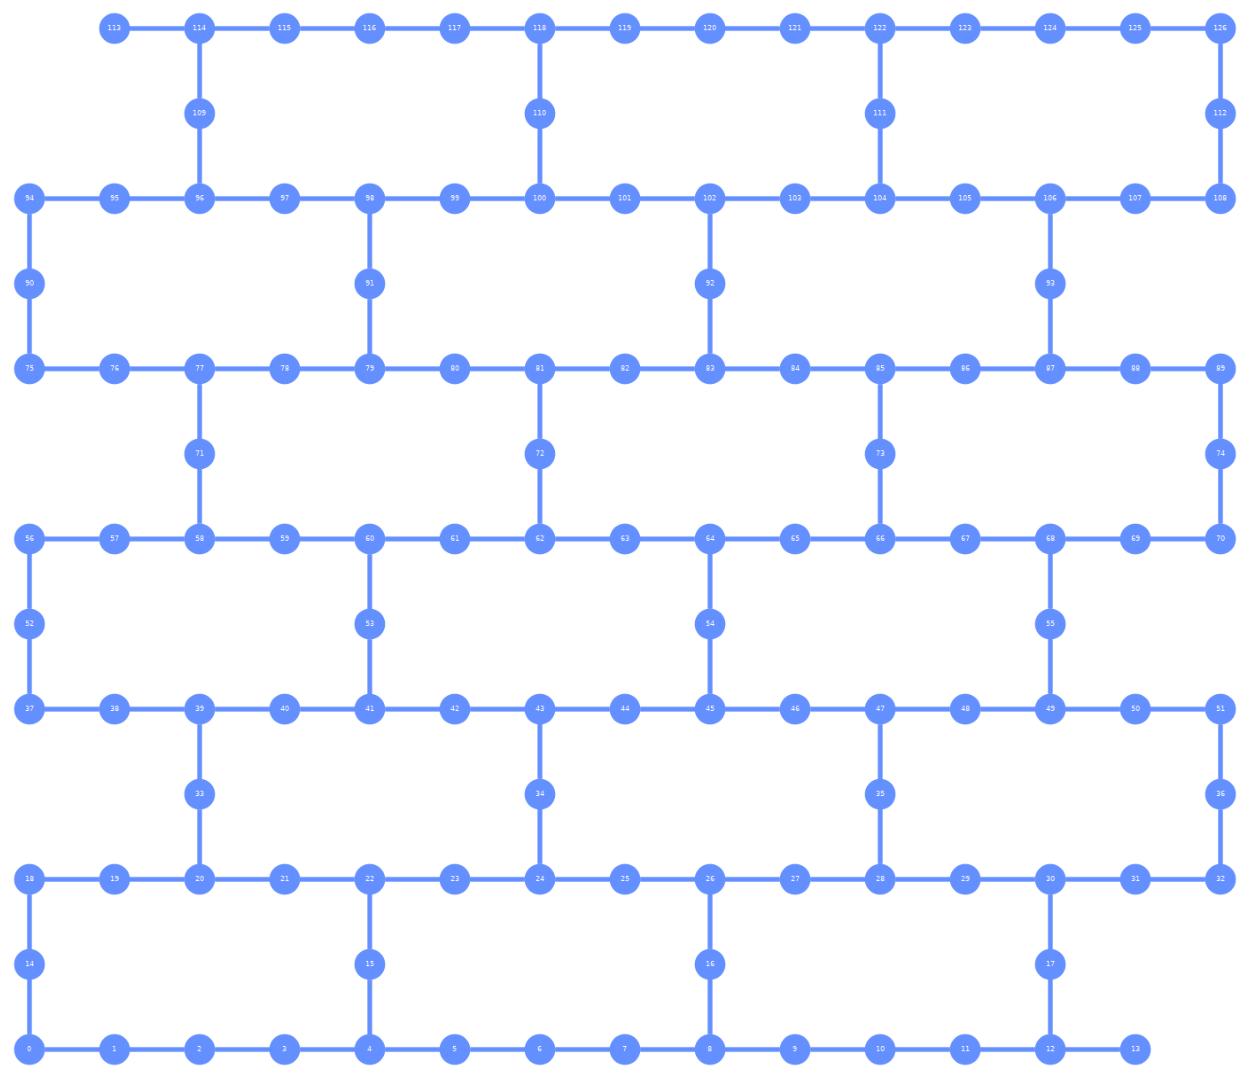

In [8]:
from qiskit.providers.fake_provider import FakeSherbrooke#CasablancaV2
backend = FakeSherbrooke()
from qiskit.visualization import plot_gate_map, plot_error_map, plot_histogram
plot_gate_map(backend)

In [2]:
import qiskit
from qiskit_ibm_runtime.fake_provider import FakeTorino
from qiskit_ibm_runtime import EstimatorV2 as Estimator

ModuleNotFoundError: No module named 'qiskit_ibm_runtime'

In [3]:
#from qiskit import QuantumCircuit, Aer, transpile, ClassicalRegister
from qiskit.visualization import plot_gate_map, plot_error_map, plot_histogram
#from qiskit.providers.fake_provider import FakeSherbrooke, FakeQuitoV2
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke, FakeQuitoV2

ModuleNotFoundError: No module named 'qiskit_ibm_runtime'

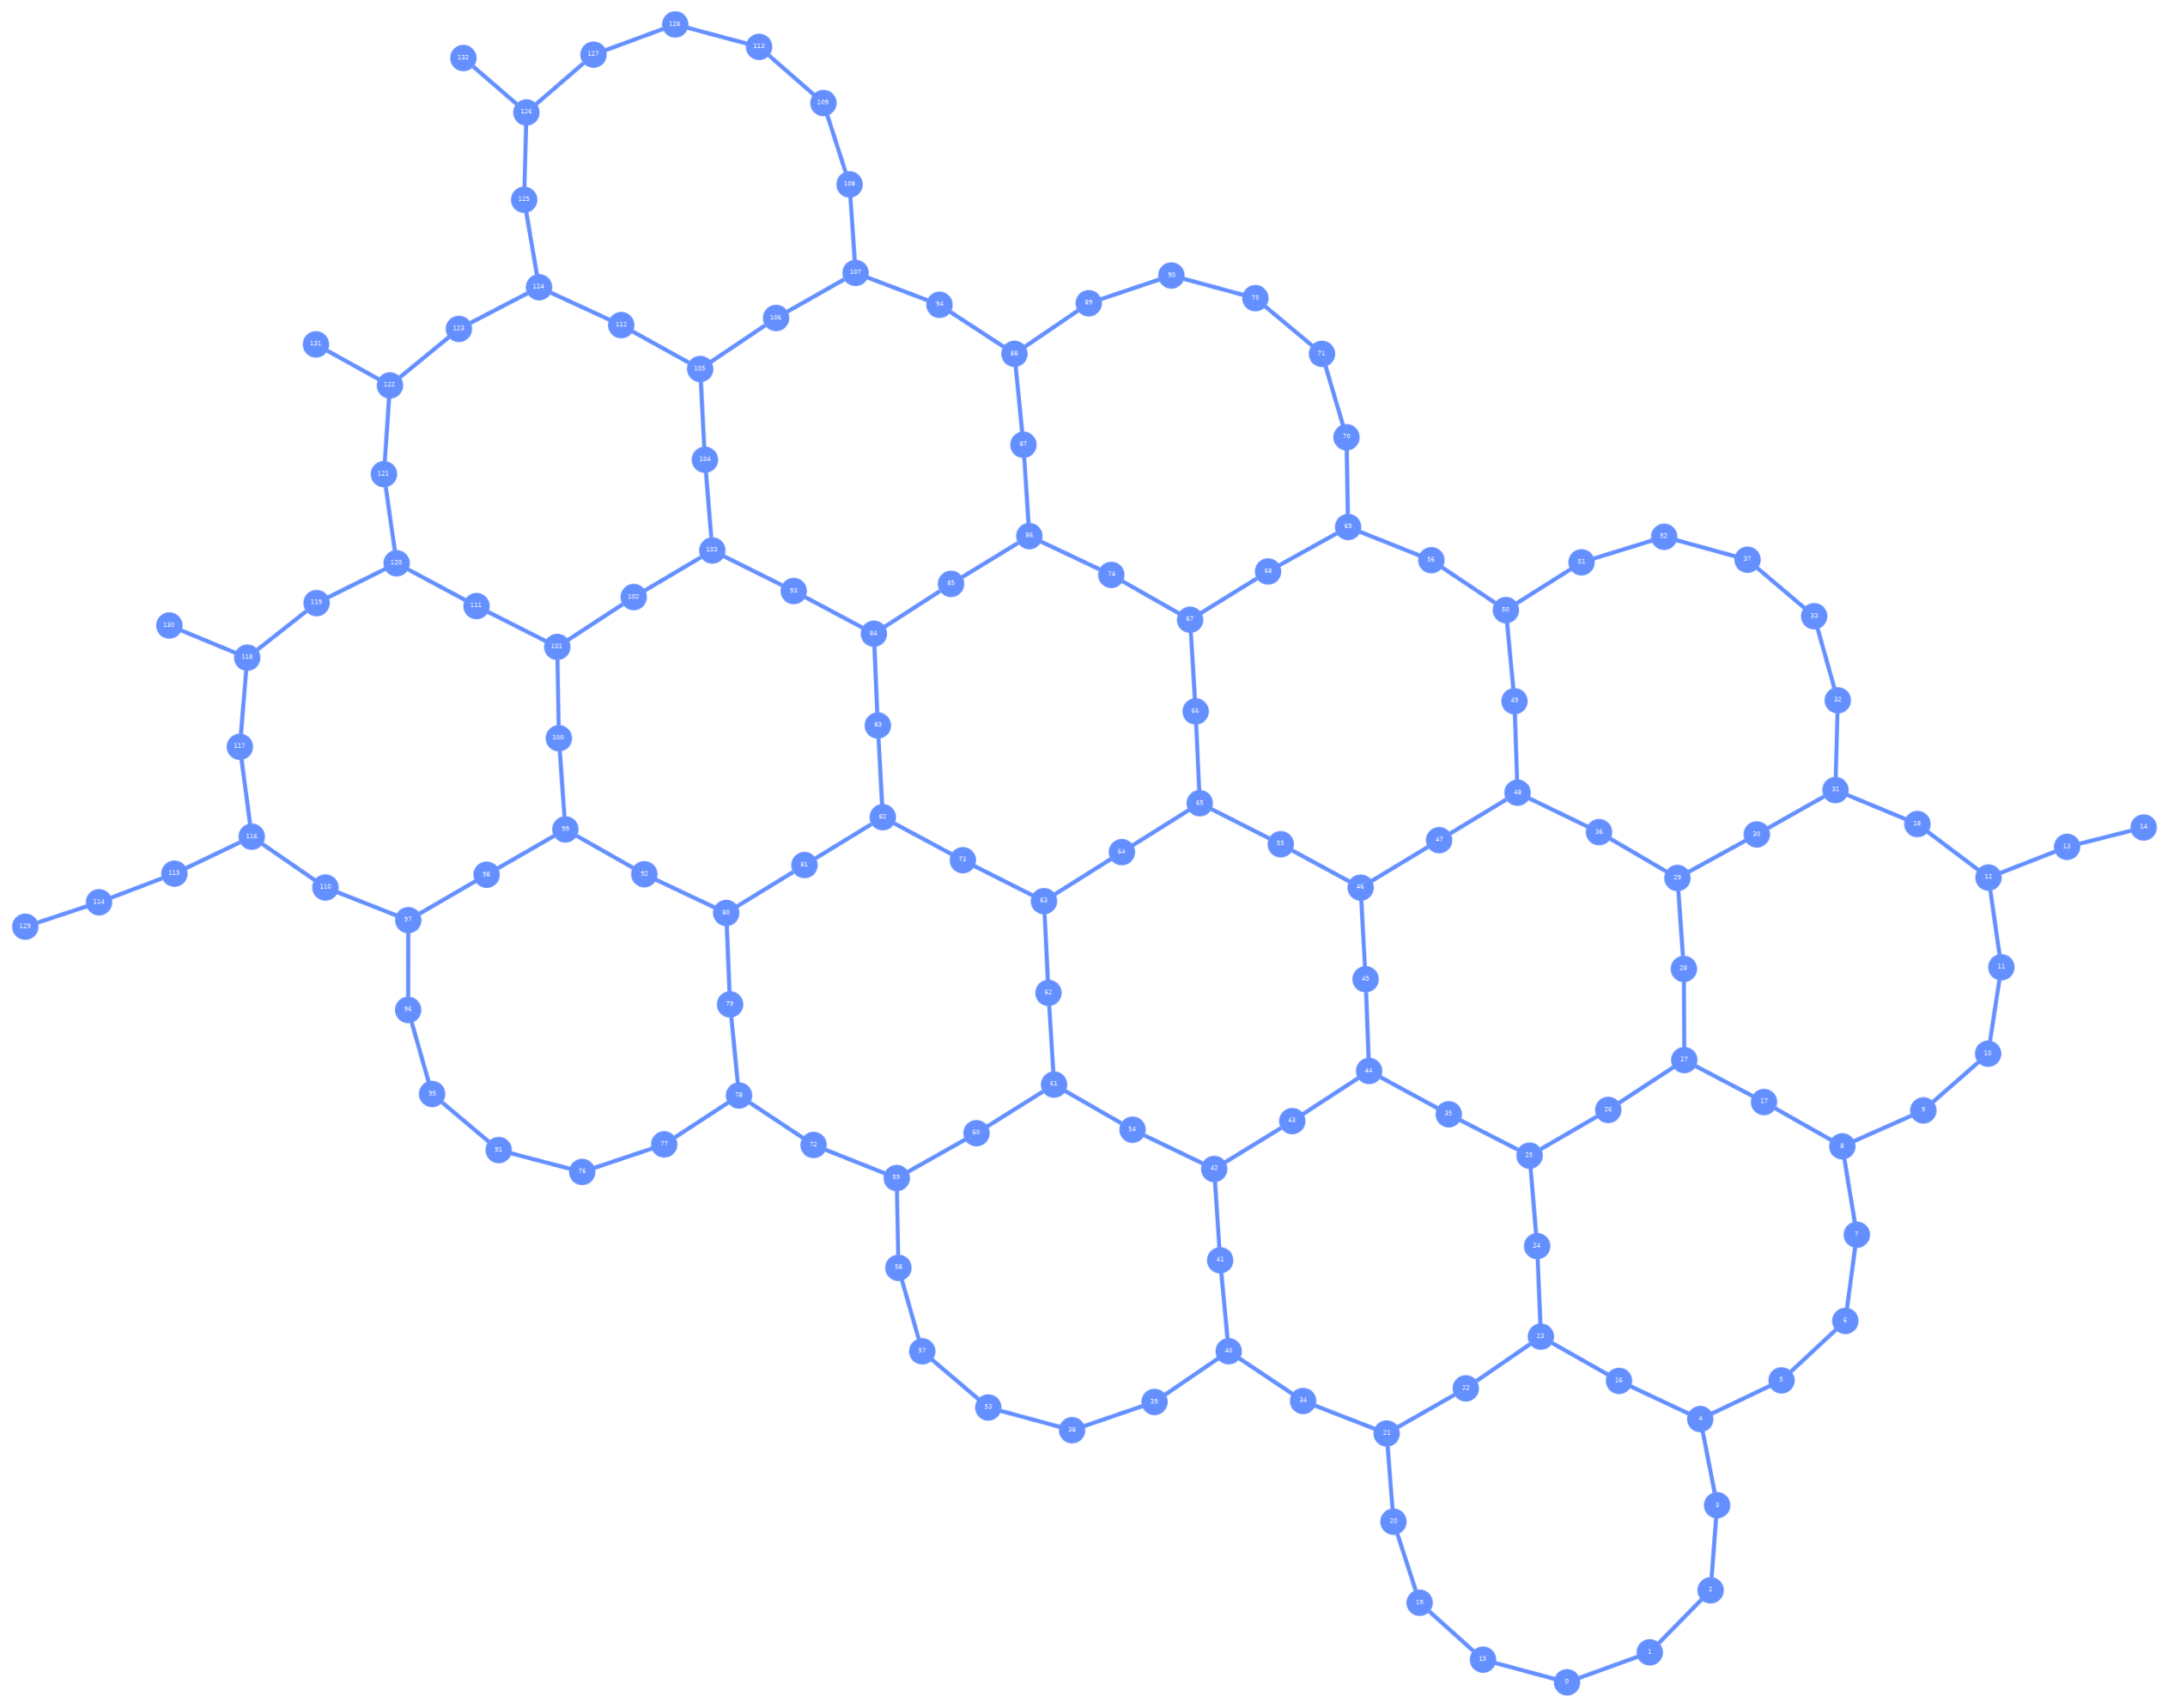

In [5]:
backend = FakeTorino()
plot_gate_map(backend)#,figsize=(30,25))
#plot_error_map(backend)

In [7]:
connectivity = backend.coupling_map.graph.subgraph([i for i in range(12)])
connectivity.edge_list()

In [ ]:
skip_edges = [15,16,17] # range 33

In [13]:
backend.coupling_map.connected_components()[0].graph[4]

4

[(0, 2), (2, 0), (0, 1), (1, 0)]


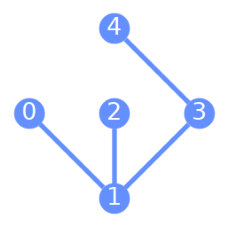

In [48]:
backend  = FakeQuitoV2()
# Ok so this labels the inst_map = [1,2,3] physical qubits on the device as [0,1,2] and then gives the coupling map
print([(i,j) for i,j in backend.coupling_map.reduce([1,2,3]).get_edges()])

plot_gate_map(backend)

In [15]:
backend  = FakeSherbrooke() #[i for i in range(14)]
[(i,j) for i,j in backend.coupling_map.reduce([3,4,5,15]).get_edges()]

[(2, 1), (1, 0), (1, 3)]

In [41]:
skip_edges = [15,16,17]
[i for i in range(20) if i not in skip_edges]
#[13-i for i in range(32)]
[(i,j) for i,j in backend.coupling_map.reduce([i for i in range(20) if i not in skip_edges]).get_edges()]
# below shows that it makes 18,19 qubits as 15 and 16

[(5, 4),
 (4, 3),
 (8, 9),
 (12, 13),
 (14, 0),
 (3, 2),
 (7, 6),
 (10, 11),
 (14, 15),
 (1, 2),
 (6, 5),
 (10, 9),
 (15, 16),
 (1, 0),
 (8, 7),
 (11, 12)]

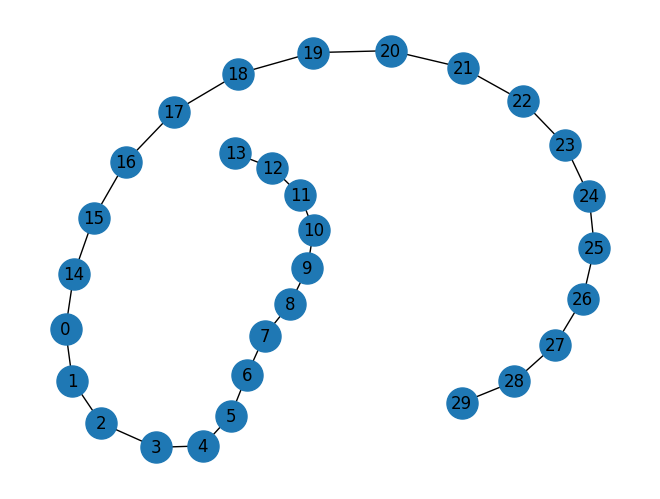

In [46]:
import networkx as nx 
import matplotlib as plt
G = nx.Graph()
G.add_edges_from([(i,j) for i,j in backend.coupling_map.reduce([i for i in range(33) if i not in skip_edges]).get_edges()])
pos = nx.spring_layout(G)
nx.draw(G, pos = nx.spring_layout(G),with_labels = True,node_size = 500)
# below shows that it makes 18,19 qubits as 15 and 16

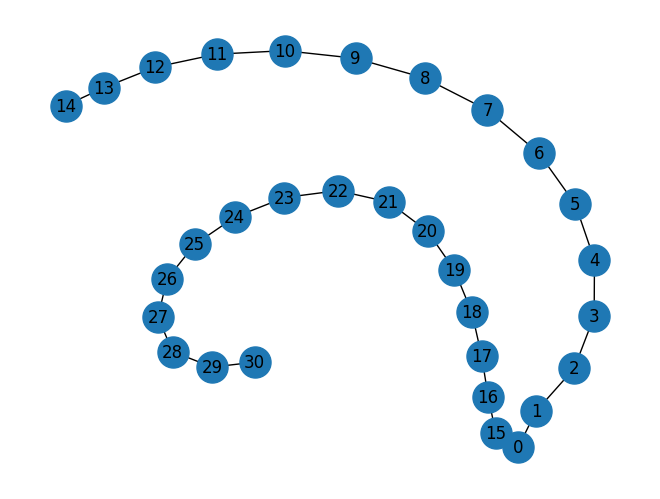

In [18]:
skip_edges_torino = [16,17,18,34,35,36]
import networkx as nx 
import matplotlib as plt
G = nx.Graph()
G.add_edges_from([(i,j) for i,j in backend.coupling_map.reduce([i for i in range(34) if i not in skip_edges_torino]).get_edges()])
pos = nx.spring_layout(G)
nx.draw(G, pos = nx.spring_layout(G),with_labels = True,node_size = 500)

In [42]:
# for torino geometry --15
coupling = [(i,j) for i,j in backend.coupling_map.reduce([i for i in range(15) if i not in skip_edges_torino]).get_edges()]
coupling

[(0, 1),
 (1, 0),
 (1, 2),
 (2, 1),
 (2, 3),
 (3, 2),
 (3, 4),
 (4, 3),
 (4, 5),
 (5, 4),
 (5, 6),
 (6, 5),
 (6, 7),
 (7, 6),
 (7, 8),
 (8, 7),
 (8, 9),
 (9, 8),
 (9, 10),
 (10, 9),
 (10, 11),
 (11, 10),
 (11, 12),
 (12, 11),
 (12, 13),
 (13, 12),
 (13, 14),
 (14, 13)]

In [43]:
connecting_bonds = []
for (i,j) in coupling:
    if i<j:
        print((i,j))
        connecting_bonds.append((i,j))

len(connecting_bonds)

(0, 1)
(1, 2)
(2, 3)
(3, 4)
(4, 5)
(5, 6)
(6, 7)
(7, 8)
(8, 9)
(9, 10)
(10, 11)
(11, 12)
(12, 13)
(13, 14)


14

In [44]:
from qiskit import QuantumCircuit
import numpy as np
qc = QuantumCircuit(len(connecting_bonds)+1)
for (i,j) in connecting_bonds:
    if i%2==0:
        qc.cx(i,j)
        qc.rz(np.pi/2,i)
        qc.cx(i,j)
qc.barrier()
for (i,j) in connecting_bonds:
    if i%2!=0:
        qc.cx(i,j)
        qc.rz(np.pi/3,i)
        qc.cx(i,j)
qc.draw()

┌─────────┐      ░                      
 q_0: ──■──┤ Rz(π/2) ├──■───░──────────────────────
      ┌─┴─┐└─────────┘┌─┴─┐ ░      ┌─────────┐     
 q_1: ┤ X ├───────────┤ X ├─░───■──┤ Rz(π/3) ├──■──
      └───┘┌─────────┐└───┘ ░ ┌─┴─┐└─────────┘┌─┴─┐
 q_2: ──■──┤ Rz(π/2) ├──■───░─┤ X ├───────────┤ X ├
      ┌─┴─┐└─────────┘┌─┴─┐ ░ └───┘┌─────────┐└───┘
 q_3: ┤ X ├───────────┤ X ├─░───■──┤ Rz(π/3) ├──■──
      └───┘┌─────────┐└───┘ ░ ┌─┴─┐└─────────┘┌─┴─┐
 q_4: ──■──┤ Rz(π/2) ├──■───░─┤ X ├───────────┤ X ├
      ┌─┴─┐└─────────┘┌─┴─┐ ░ └───┘┌─────────┐└───┘
 q_5: ┤ X ├───────────┤ X ├─░───■──┤ Rz(π/3) ├──■──
      └───┘┌─────────┐└───┘ ░ ┌─┴─┐└─────────┘┌─┴─┐
 q_6: ──■──┤ Rz(π/2) ├──■───░─┤ X ├───────────┤ X ├
      ┌─┴─┐└─────────┘┌─┴─┐ ░ └───┘┌─────────┐└───┘
 q_7: ┤ X ├───────────┤ X ├─░───■──┤ Rz(π/3) ├──■──
      └───┘┌─────────┐└───┘ ░ ┌─┴─┐└─────────┘┌─┴─┐
 q_8: ──■──┤ Rz(π/2) ├──■───░─┤ X ├───────────┤ X ├
      ┌─┴─┐└─────────┘┌─┴─┐ ░ └───┘┌─────────┐└───┘
 q_9: ┤ X ├───────────┤ X ├─░───■──┤ Rz(π/3) ├──■──
      └───┘┌─────────┐└───┘ ░ ┌─┴─┐└─────────┘┌─┴─┐
q_10: ──■──┤ Rz(π/2) ├──■───░─┤ X ├───────────┤ X ├
      ┌─┴─┐└─────────┘┌─┴─┐ ░ └───┘┌─────────┐└───┘
q_11: ┤ X ├───────────┤ X ├─░───■──┤ Rz(π/3) ├──■──
      └───┘┌─────────┐└───┘ ░ ┌─┴─┐└─────────┘┌─┴─┐
q_12: ──■──┤ Rz(π/2) ├──■───░─┤ X ├───────────┤ X ├
      ┌─┴─┐└─────────┘┌─┴─┐ ░ └───┘┌─────────┐└───┘
q_13: ┤ X ├───────────┤ X ├─░───■──┤ Rz(π/3) ├──■──
      └───┘           └───┘ ░ ┌─┴─┐└─────────┘┌─┴─┐
q_14: ──────────────────────░─┤ X ├───────────┤ X ├
                            ░ └───┘           └───┘

# create pauli groups and pauli strings for linear spin-chains 

In [22]:
# for Sherbrooke geometry --15
skip_edges_Sherbrooke = [14,15,16,17] # range(14)
coupling = [(i,j) for i,j in backend.coupling_map.reduce([i for i in range(5) if i not in skip_edges_Sherbrooke]).get_edges()]
print(coupling)
len(coupling)

[(4, 3), (3, 2), (1, 2), (1, 0)]


4

In [23]:
connecting_bonds = []
for (i,j) in coupling:
    if i<j:
        #print((i,j))
        connecting_bonds.append((i,j))
    else:
        connecting_bonds.append((j,i))

print(connecting_bonds)
len(connecting_bonds)


[(3, 4), (2, 3), (1, 2), (0, 1)]


4

In [28]:
# need to build the hamiltonian pairs now 
ham = []
paulis_5 = []
s = 'III'

for pauli in ["Z"]:
    for bond in connecting_bonds: 
        list_s = list(s)
        list_s.insert(bond[0], pauli)
        list_s.insert(bond[1], pauli)
        
        if pauli == "X":
            pauli_string="1.0*" + ''.join(list_s)
        elif pauli == "Y":
            pauli_string="1.0*" + ''.join(list_s)
        elif pauli == "Z":
            pauli_string="-1.0*" + ''.join(list_s)
        paulis_5.append(''.join(list_s))
        ham.append(pauli_string)

Ham = ham+['-1.0*ZIIIZ']+['0.5*ZIIII','0.5*IZIII', '0.5*IIZII', '0.5*IIIZI' , '0.5*IIIIZ','-1*XIIII','-1*IXIII', '-1*IIXII', '-1*IIIXI' , '-1*IIIIX']

In [31]:
import sys 
#sys.path.append("/home/prachi/Dropbox/QC_projects/com")
from pauli_alegbra import *

power = 3
H = Ham

ham_p_strings = []
for i in kse_pauli_strings(H,3):
    ham_p_strings.extend([j for j in i])
#print("pinted h3 = ",h3)
#print("hamiltonian = ",[i.split('*')[1] for i in H])


print(len(ham_p_strings))


 
qwc = qubitwise_commuting_strings_u_qiskit(ham_p_strings)
print(len(qwc))

#qwc_penny = qubitwise_commuting_strings_u_pennylane(ham_p_strings)
#print(len(qwc_penny))

306
32


In [34]:
# for K = 1 Krylov subspace expansion 
# device = Sherbrooke 
# linear spin chain of 5 qubits with periodic boundary conditions 
device = "Sherbrooke" 
Qctrl_QPU_time = 4000 # QCtrl paper: 4000 shots per second
num_shots_tomo = 1000

#Tomography step

num_samples_pair_meas = 50
num_samples_single_meas = 100
meas_basis = 9
num_cir_depth = 4 # [2,4,8,16]

##
total_pair_meas = meas_basis*num_samples_pair_meas*num_cir_depth*num_shots_tomo
total_single_meas = meas_basis*num_samples_single_meas*num_shots_tomo
tot_tomo_shots = (total_pair_meas+total_single_meas)

runtime_tomo = tot_tomo_shots/Qctrl_QPU_time #(in seconds)
print("\n QPU time for tomography step in (d:hh:mm:ss): ",convert(runtime_tomo))

# PER time 
num_shots_PER = 250
num_Pauli_groups = 32 #(Guadalupe)
num_noise_strength = 3 #  [0,0.25,0.5,0.75,1,1.5]
num_PER_samples = 500

total_PER_shots = (num_Pauli_groups * num_PER_samples* num_noise_strength *num_shots_PER)
runtime_PER = total_PER_shots/Qctrl_QPU_time

print(f"\n QPU time for PER step for circuit run of {total_PER_shots} in (d:hh:mm:ss): ",convert(runtime_PER))
print(f"\n Total QPU time for the calculations on {device} is: {convert(runtime_tomo+runtime_PER)} ")


 QPU time for tomography step in (d:hh:mm:ss):  0:00:11:15

 QPU time for PER step for circuit run of 12000000 in (d:hh:mm:ss):  0:00:50:00

 Total QPU time for the calculations on Sherbrooke is: 0:01:01:15 
